In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.datasets import load_digits

In [2]:
digit = load_digits()

In [3]:
digit.data.shape
# digit.target.shape

(1797, 64)

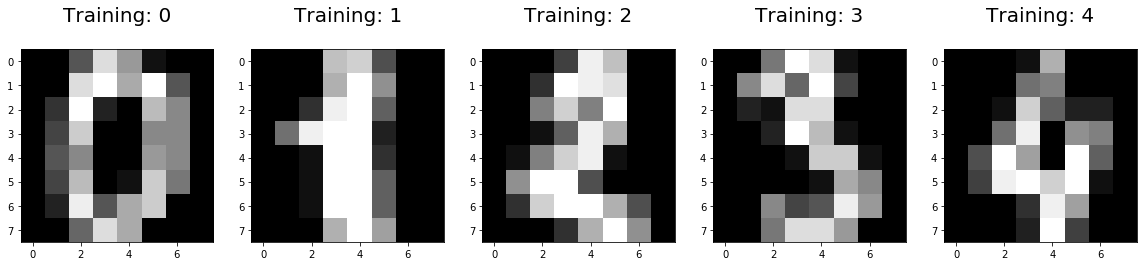

In [5]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digit.data[0:5], digit.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n'% label, fontsize=20)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, test_size=0.23, random_state=2)

In [12]:
y_test.shape

(414,)

In [7]:
from sklearn.linear_model import LogisticRegression

In [14]:
reg = LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
x_test[0]

array([ 0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,
       11.,  0.,  0.,  0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.,  2.,
       14., 12., 16.,  5.,  0.,  0.,  0., 10., 16., 14., 16., 16., 11.,
        0.,  0.,  5., 12., 13., 16.,  8.,  3.,  0.,  0.,  0.,  0.,  2.,
       15.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.])

In [19]:
reg.predict(x_test[0].reshape(1, -1))

array([4])

In [21]:
print(reg.predict(x_test[0:10]))

[4 0 9 1 8 7 1 5 1 6]


In [23]:
y_pred = reg.predict(x_test)

In [26]:
score = reg.score(x_test, y_test)
print(score)

0.9420289855072463


In [28]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  1  0  0  0  0  2  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  3  2  0]
 [ 0  2  0  0 34  0  0  0  1  1]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  2  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  1  3 28]]


Text(0.5, 1, 'Accuracy score: 0.9420289855072463')

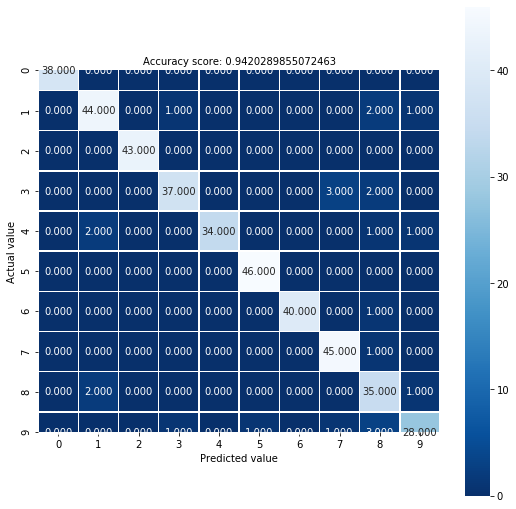

In [39]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=0.5, fmt='.3f', square=True, cmap='Blues_r')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
title_ = 'Accuracy score: {0}'.format(score)
plt.title(title_, size=10)

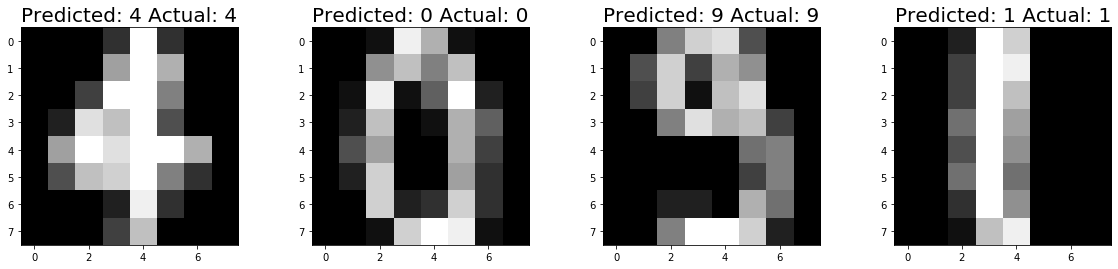

In [41]:
index = 0
classifiedIndex = []
for predicted, actual in zip(y_pred, y_test):
    if predicted == actual:
        classifiedIndex.append(index)
    index += 1
plt.figure(figsize=(20,4))

for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {} Actual: {}'.format(y_pred[wrong], y_test[wrong]), fontsize=20)